In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
data= pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
fraud= data.loc[data["Class"]==1]
innocent = data.loc[data["Class"]==0]

In [6]:
#number of fraud cases
len(fraud)

492

In [7]:
len(innocent)

284315

In [8]:
print(len(fraud)/ float(len(innocent)))

0.0017304750013189597


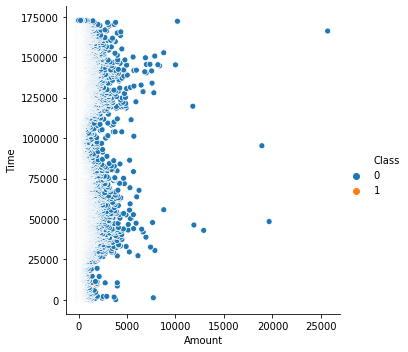

In [9]:
sns.relplot(x="Amount", y="Time", hue="Class", data=data)

In [10]:
Z= data["Amount"]

In [11]:

outliers=[]
def detect_outliers(df):
    threshold=3
    
    mean= np.mean(df)
    std= np.std(df)
    
    for i in df:
        z_score= (i - mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers    

In [12]:
outlier_pts= detect_outliers(Z)
print("The number of outliers in the dataset are:",len(outlier_pts))

The number of outliers in the dataset are: 4076


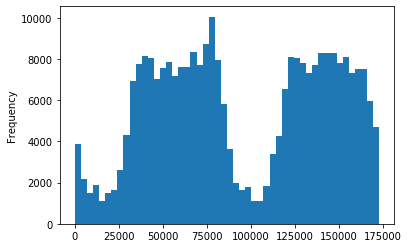

In [13]:
data["Time"].plot.hist(bins=50)

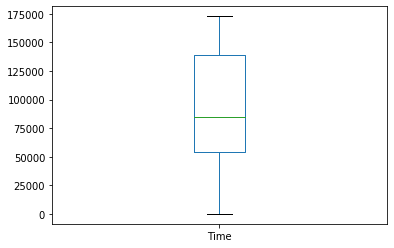

In [14]:
data.plot(x="Amount", y="Time", kind="box")

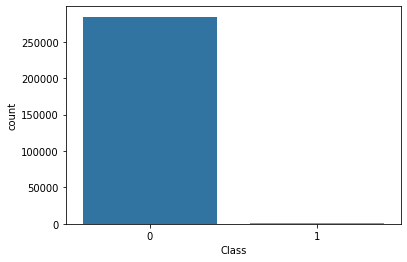

In [15]:
sns.countplot(x='Class',  data = data)

In [16]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
innocent.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

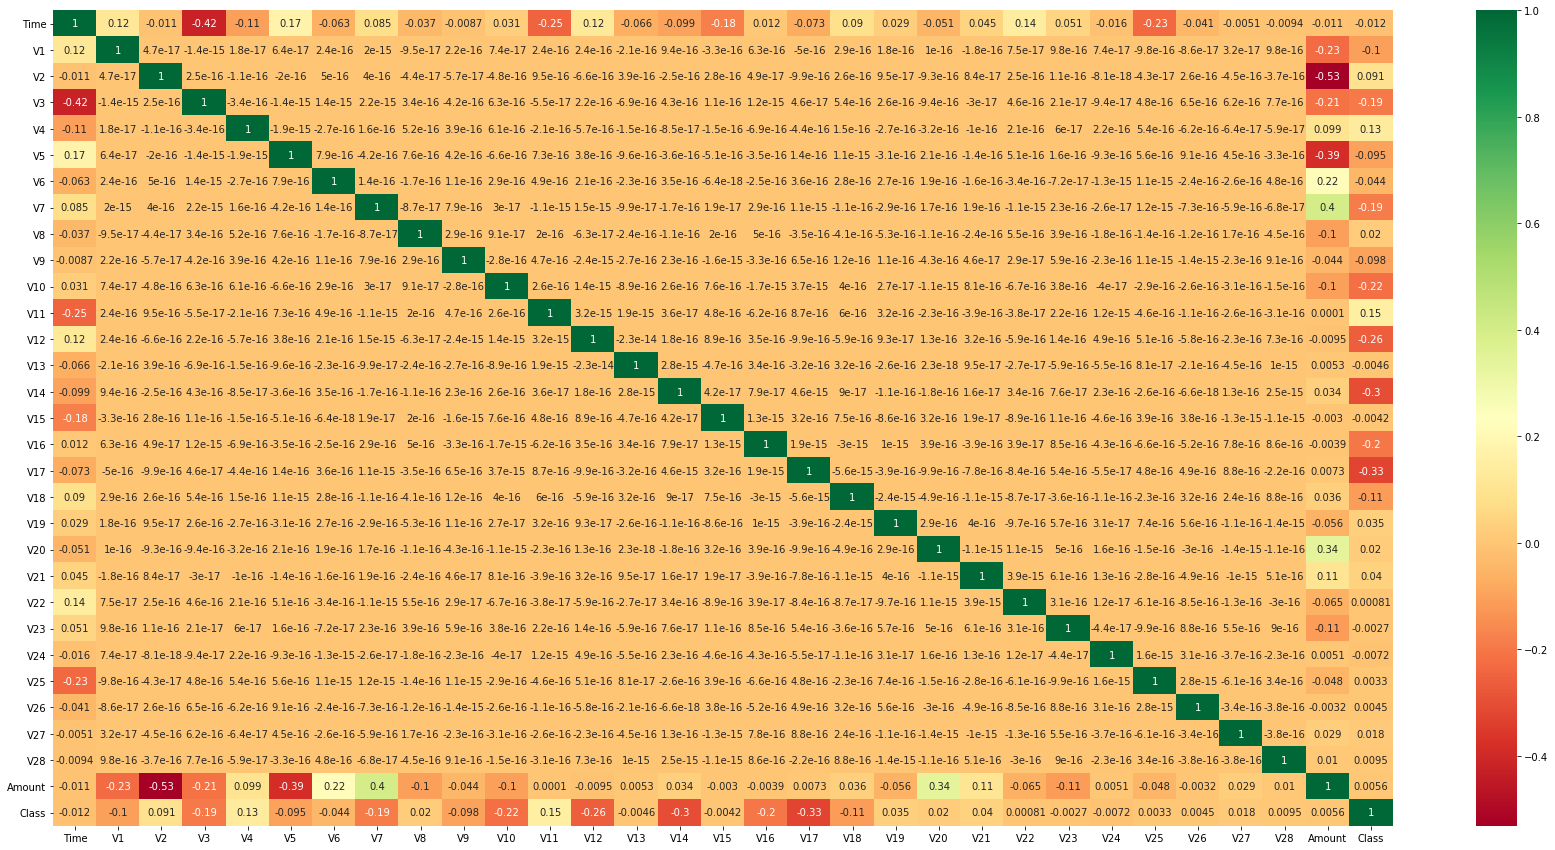

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(30.0,15.0)

corrmat = data.corr()
top_corr_features = corrmat.index
#plot heat map
g= sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [19]:
data = data.sample(frac=0.1)

In [22]:
from sklearn.neighbors import LocalOutlierFactor
X= data.iloc[:,:-1]
y= data["Class"]


In [30]:
from sklearn.metrics import accuracy_score, classification_report

outlier_fraction = len(fraud)/float(len(innocent))
a = LocalOutlierFactor(n_neighbors = 20,contamination = outlier_fraction)
y_prediction1 = a.fit_predict(X) # Fitting the model.
y_prediction1[y_prediction1 == 1] = 0 # Valid transactions are labelled as 0.
y_prediction1[y_prediction1 == -1] = 1 # Fraudulent transactions are labelled as 1.
errors1 = (y_prediction1 != y).sum() # Total number of errors is calculated.
print("Errors:",errors1)


Errors: 103


In [31]:
print("Accuracy score of the model is:", accuracy_score(y_prediction1,y))


Accuracy score of the model is: 0.9963835539482462


In [32]:
print("Classification report is:",classification_report(y_prediction1,y))

Classification report is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.00      0.00      0.00        50

    accuracy                           1.00     28481
   macro avg       0.50      0.50      0.50     28481
weighted avg       1.00      1.00      1.00     28481



In [33]:
#Implementing Isolation forest algorithm for predicting the Innocent and fraud cases.
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [34]:
#Breaking the fraud and Innocent cases into Train and Test Split data. 
innocent_train, innocent_test = train_test_split(innocent, test_size=0.30, random_state=42)
fraud_train, fraud_test=train_test_split(fraud, test_size=0.30, random_state=42)


In [35]:
#Predicting the variables
model = IsolationForest(behaviour = 'new')
model.fit(innocent_train)
innocent_pred = model.predict(innocent_test)
fraud_pred= model.predict(fraud_test)


C:\Users\Sanjula Mathur\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


In [37]:
#Printing the accuracy of the model
innocent_cases=list(innocent_pred).count(1)/innocent_pred.shape[0]
fraud_cases=list(fraud_pred).count(-1)/fraud_pred.shape[0]
print("Innocent cases accuracy:", innocent_cases)
print("Fraud Cases accuracy:", fraud_cases)

Innocent cases accuracy: 0.955437012720558
Fraud Cases accuracy: 0.8648648648648649


In [38]:
#Printing the percentage of accuracy
print(innocent_cases*100,"%")
print(fraud_cases*100,"%")

95.5437012720558 %
86.48648648648648 %
